# Import packages

In [43]:
import pandas as pd
import numpy as np
from numpy import datetime64
import warnings

In [44]:
warnings.filterwarnings("ignore")

# Read in data

In [45]:
df = pd.read_excel('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/SurveyExport_Merged.xlsx')
# df = pd.read_excel('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/SurveyExport_Merged.xlsx')

myth_vars = pd.read_csv('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/2_DATA_PROCESSING/myth_vars.csv')
# myth_vars = pd.read_csv('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/2_DATA_PROCESSING/myth_vars.csv')

unique_myths = myth_vars.survey_var.unique() # gets list of unique myths thesee all have numbers though
myth_vars.head()


,survey_var,result_var,inaccurate
0,M1_VaxFail,VaxFail,Yes
1,M10_KidMild,KidMild,Yes
2,M11_KidSafe,KidSafe,Yes
3,M12_Booster,Booster,Yes
4,M13_CovPill,CovPill,Yes


In [46]:
MIassess = df[["ExternalReference", "M_more", "surveydate", "M_more_react"]].dropna()
MIassess["Category of myth"] = ""
MIassess["Subcategory of myth"] = ""
MIassess["Sub-sub category of myth"] = ""
MIassess["Investigate further (y/n)"] = ""
MIassess["Link to reference for myth"] = ""
MIassess["Classification (false, unproven, true)"] = ""
# pd.DataFrame(MIassess).to_excel('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/MIassess.xlsx', header=True, index=False)
pd.DataFrame(MIassess).to_excel('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/MIassess.xlsx', header=True, index=False)

In [47]:
STL_better = df[["ExternalReference", "STL_Better", "surveydate"]].dropna()
pd.DataFrame(STL_better).to_excel('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/STL_better.xlsx', header=True, index=False)
# pd.DataFrame(STL_better).to_excel('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/STL_better.xlsx', header=True, index=False)

In [48]:
inaccurate = (myth_vars[(myth_vars['inaccurate'] == 'Yes')]).survey_var.unique()
accurate = (myth_vars[(myth_vars['inaccurate'] == 'No')]).survey_var.unique()

In [49]:
unique_sites = pd.unique(df['site'])
unique_sources = ['On social media', 'Other internet source', 'TV/radio']

In [50]:
result = []
result.append(['myth', 'survey_date', 'group', 'exposure', 'believe'])
print(type(result))

source_result = []
source_result.append(['myth', 'survey_date', 'source_pct', 'source'])

<class 'list'>


In [51]:
df_accurate = df[['surveydate', 'site']]
df_inaccurate = df[['surveydate', 'site']]

any_heard_result = []
any_heard_result.append(['surveydate', 'sum_inac', 'count_inac', 'inaccurate_pct', 'sum_acc', 'count_acc', 'accurate_pct', 'source'])
# In[25]:

#Create seperate dataframes for accurate and inaccurate myths
for each_myth in unique_myths:
    df_extracted = df[[each_myth]]
    if (each_myth in accurate):
        df_accurate = pd.concat([df_accurate, df_extracted], axis=1)

    if (each_myth in inaccurate):
        df_inaccurate = pd.concat([df_inaccurate, df_extracted], axis=1)


In [52]:
def any_heard(each_date, each_site):
    if(each_site == 'All'):
        acc_for_date = df_accurate.loc[df_accurate['surveydate'] == each_date]
        inacc_for_date = df_inaccurate.loc[df_inaccurate['surveydate'] == each_date]
        length_total = acc_for_date.shape[0]

        temp_acc = acc_for_date.iloc[:, 2:]
        temp_acc = temp_acc[(temp_acc == 'Yes').any(axis=1)]
        length_of_temp_acc = len(temp_acc[(temp_acc == 'Yes').any(axis=1)])

        temp_inacc = inacc_for_date.iloc[:, 2:]
        temp_inacc = temp_inacc[(temp_inacc == 'Yes').any(axis=1)]
        length_of_temp_inacc = len(temp_inacc[(temp_inacc == 'Yes').any(axis=1)])

        if(length_total > 0):
            row_to_input = [each_date, length_of_temp_inacc, length_total, round((length_of_temp_inacc / length_total), 2), length_of_temp_acc, length_total, round((length_of_temp_acc / length_total), 2), 'All']
        else:
            row_to_input = [each_date, length_of_temp_inacc, length_total, 0, length_of_temp_acc, length_total, 0, 'All']
        any_heard_result.append(row_to_input)

    elif (each_site != 'All'):
        acc_for_date = df_accurate[(df_accurate['surveydate'] == each_date) & (df_accurate['site'] == each_site)]
        inacc_for_date = df_inaccurate.loc[df_inaccurate['surveydate'] == each_date]
        length_total = acc_for_date.shape[0]

        temp_acc = acc_for_date.iloc[:, 2:]
        temp_acc = temp_acc[(temp_acc == 'Yes').any(axis=1)]
        length_of_temp_acc = len(temp_acc[(temp_acc == 'Yes').any(axis=1)])

        temp_inacc = inacc_for_date.iloc[:, 2:]
        temp_inacc = temp_inacc[(temp_inacc == 'Yes').any(axis=1)]
        length_of_temp_inacc = len(temp_inacc[(temp_inacc == 'Yes').any(axis=1)])

        if(length_total >  0):
            row_to_input = [each_date, length_of_temp_inacc, length_total, round((length_of_temp_inacc / length_total), 2), length_of_temp_acc, length_total, round((length_of_temp_acc / length_total), 2), each_site]

        else:
            row_to_input = [each_date, length_of_temp_inacc, length_total, 0, length_of_temp_acc, length_total, 0, 'All']
        any_heard_result.append(row_to_input)


In [53]:
def source_calculation(source_result, unique_sources, date_column, each_myth, each_site):
    if (each_site != 'All'):
        source_total = len(df_source[(df_source[each_myth] == 'Yes') & (df_source['site'] == each_site) & (df_source['surveydate'] == date_column)])
        source_said_yes_max = len(df_source[(df_source[each_myth + '_where'].str.contains('Family member or friend|Neighbor or coworker|Someone else')) &
                                            (df_source['site'] == each_site) &
                                            (df_source['surveydate'] == date_column)])
        each_source_max = 'Family friend or someone else'
        for each_source in unique_sources:
            source_said_yes = len(df_source[(df_source[each_myth + '_where'].str.contains(each_source)) & (df_source['site'] == each_site) & (df_source['surveydate'] == date_column)])
            if (source_said_yes > source_said_yes_max):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
            elif ((source_said_yes == source_said_yes_max) and (each_source == 'TV/Radio' or each_source == 'Other internet source')):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
        if (source_said_yes_max > 0 and source_total > 0):
            row_to_input = [each_myth, date_column, round((source_said_yes_max / source_total) * 100, 1), each_source_max, each_site]
            source_result.append(row_to_input)
    elif(each_site == 'All'):
        source_total = len(df_source[(df_source[each_myth] == 'Yes') & (df_source['surveydate'] == date_column)])
        source_said_yes_max = len(df_source[(df_source[each_myth + '_where'].str.contains('Family member or friend|Neighbor or coworker|Someone else')) &
                                            (df_source['surveydate'] == date_column)])
        each_source_max = 'Family friend or someone else'
        for each_source in unique_sources:
            source_said_yes = len(df_source[(df_source[each_myth + '_where'].str.contains(each_source)) & (df_source['surveydate'] == date_column)])
            if (source_said_yes > source_said_yes_max):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
            elif ((source_said_yes == source_said_yes_max) and (each_source == 'TV/Radio' or each_source == 'Other internet source')):
                source_said_yes_max = source_said_yes
                each_source_max = each_source
        if (source_said_yes_max > 0 and source_total > 0):
            row_to_input = [each_myth, date_column, round((source_said_yes_max / source_total) * 100, 1), each_source_max, 'All']
            source_result.append(row_to_input)


In [54]:
def populate_results(result, unique_column, column_name, date_column, each_myth, each_site):
    if (each_site != 'All' and column_name  != 'All'):
        for each_value in unique_column:
            myth_total = len(df1[(df1[column_name] == each_value) & (df1['site'] == each_site) & (df1['surveydate'] == date_column)])
            myth_yes = len(df1[(df1[column_name] == each_value) & (df1['site'] == each_site) & (df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

            df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
            df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

            believe_total = len(df3[(df3['sub_rank'] == 1) & (df3[column_name] == each_value) & (df3['site'] == each_site)])
            believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1) & (df3[column_name] == each_value) & (df3['site'] == each_site)])

            if (believe_total != 0 and myth_total != 0):
                single_all_row = [each_myth, date_column, each_value, round((myth_yes / myth_total) * 100, 1),round((believe_first / believe_total) * 100, 1), each_site]
                result.append(single_all_row)

    elif(each_site == 'All' and column_name != 'All'):
        for each_value in unique_column:
            myth_total = len(df1[(df1[column_name] == each_value) & (df1['surveydate'] == date_column)])
            myth_yes = len(df1[(df1[column_name] == each_value) & (df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

            df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
            df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

            believe_total = len(df3[(df3['sub_rank'] == 1) & (df3[column_name] == each_value)])
            believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1) & (df3[column_name] == each_value)])

            if (believe_total != 0 and myth_total != 0):
                single_all_row = [each_myth, date_column, each_value, round((myth_yes / myth_total) * 100, 1),round((believe_first / believe_total) * 100, 1), 'All']
                result.append(single_all_row)

    elif (each_site != 'All' and column_name == 'All'):
        myth_total = len(df1[(df1['site'] == each_site) & (df1['surveydate'] == date_column)])
        myth_yes = len(df1[(df1['site'] == each_site) & (df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

        df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
        df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

        believe_total = len(df3[(df3['sub_rank'] == 1) & (df3['site'] == each_site)])
        believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1) & (df3['site'] == each_site)])

        if (believe_total != 0 and myth_total != 0):
            single_all_row = [each_myth, date_column, 'All', round((myth_yes / myth_total) * 100, 1),round((believe_first / believe_total) * 100, 1), each_site]
            result.append(single_all_row)

    elif (each_site == 'All' and column_name == 'All'):
        myth_total = len(df1[(df1['surveydate'] == date_column)])
        myth_yes = len(df1[(df1['surveydate'] == date_column) & (df1[each_myth] == 'Yes')])

        df_believe_not_null['sub_rank'] = df_believe_not_null.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
        df3 = df_believe_not_null.loc[df_believe_not_null['surveydate'] <= date_column]

        believe_total = len(df3[(df3['sub_rank'] == 1)])
        believe_first = len(df3[(df3['sub_rank'] == 1) & (df3[each_myth + '_react'] == 1)])

        if (believe_total != 0 and myth_total != 0):
            single_all_row = [each_myth, date_column, 'All', round((myth_yes / myth_total) * 100, 1), round((believe_first / believe_total) * 100, 1), 'All']
            result.append(single_all_row)

In [55]:
for each_myth in unique_myths:
    if each_myth in df:
        df1 = df[[each_myth, 'age_cat_current', 'gender_cat', 'race_cat', 'partype', 'surveydate', 'site']].dropna()
        unique_survey_dates = df1.surveydate.unique()
        unique_race = df1.race_cat.unique()
        unique_gender = df1.gender_cat.unique()
        unique_age_current= df1.age_cat_current.unique()
        unique_partype = df1.partype.unique()

        df_believe = df[[each_myth, each_myth + '_react', 'age_cat_current', 'gender_cat', 'race_cat', 'partype', 'surveydate', 'ExternalReference', 'site']].dropna()

        df_source = df[[each_myth, each_myth + '_where', 'surveydate', 'site']].dropna()
        unique_sources = df_source[each_myth + '_where'].unique()

    #############################################################################
    # #new code to calculate sources information:
    # if each_myth in df.columns:


        if each_myth in inaccurate:
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it could be true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Not sure if it\'s true or untrue'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely not true'], 0)
            df_believe[each_myth + '_React'] = df_believe[each_myth + '_react'].replace(['Seems like it\'s not true'], 0)

        if each_myth in accurate:
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it could be true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely true'], 1)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Not sure if it\'s true or untrue'], 0)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Definitely not true'], 0)
            df_believe[each_myth + '_react'] = df_believe[each_myth + '_react'].replace(['Seems like it\'s not true'], 0)

        df_believe['sub_rank'] = df_believe.groupby('ExternalReference')['surveydate'].rank(method='dense', ascending=True)
        df_believe = df_believe.astype({'surveydate': datetime64})

        df_believe_not_null = df_believe.loc[df_believe[each_myth].notnull()]

        for date_column in unique_survey_dates:
            # For each race
            unique_column = unique_race
            column_name = 'race_cat'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)

            # For each gender
            unique_column = unique_gender
            column_name = 'gender_cat'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)
            
            # For each age current
            unique_column = unique_age_current
            column_name = 'age_cat_current'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)

           # For each partype
            unique_column = unique_partype
            column_name = 'partype'
            for each_site in unique_sites:
                populate_results(result, unique_column, column_name, date_column, each_myth, each_site)

            for each_site in unique_sites:
                populate_results(result, 'All', 'All', date_column, each_myth, each_site)
                source_calculation(source_result, unique_sources, date_column, each_myth, each_site)
                any_heard(date_column, each_site)
                
            populate_results(result, 'All', 'All', date_column, each_myth, 'All')
            source_calculation(source_result, unique_sources, date_column, each_myth, 'All')
            any_heard(date_column, 'All')

In [56]:
# rename myth variable in myth_vars to myth for merging
myth_vars2 = myth_vars.rename(columns={"survey_var": "myth"})

# drop result_var
myth_vars2 = myth_vars2.drop(columns = ['result_var'])
myth_vars2.rename(columns=myth_vars2.iloc[1])
myth_vars2.head()

,myth,inaccurate
0,M1_VaxFail,Yes
1,M10_KidMild,Yes
2,M11_KidSafe,Yes
3,M12_Booster,Yes
4,M13_CovPill,Yes


In [57]:
result = pd.DataFrame(result)
new_header = result.iloc[0] # grab the first row for the header
result = result[1:] # take the data less the header row
result.columns = new_header # set the header row as the df header

In [58]:
result.head()

,myth,survey_date,group,exposure,believe,None
1,M1_VaxFail,2021-10-31T00:00:00.000000000,White,18.3,9.4,STL
2,M1_VaxFail,2021-10-31T00:00:00.000000000,Black or African American,37.5,20.0,STL
3,M1_VaxFail,2021-10-31T00:00:00.000000000,Other,25.0,33.3,STL
4,M1_VaxFail,2021-10-31T00:00:00.000000000,Female,25.4,15.6,STL
5,M1_VaxFail,2021-10-31T00:00:00.000000000,Male,16.7,9.1,STL


In [59]:
# Merge in accuracy of myth variable
results = pd.merge(result, myth_vars2)

In [60]:
results.head()

,myth,survey_date,group,exposure,believe,None,inaccurate
0,M1_VaxFail,2021-10-31T00:00:00.000000000,White,18.3,9.4,STL,Yes
1,M1_VaxFail,2021-10-31T00:00:00.000000000,Black or African American,37.5,20.0,STL,Yes
2,M1_VaxFail,2021-10-31T00:00:00.000000000,Other,25.0,33.3,STL,Yes
3,M1_VaxFail,2021-10-31T00:00:00.000000000,Female,25.4,15.6,STL,Yes
4,M1_VaxFail,2021-10-31T00:00:00.000000000,Male,16.7,9.1,STL,Yes


In [61]:
# Code threat levels
results['risk'] = 100 *(results.exposure * results.believe/(100*100))

In [62]:
# take the inverse for accurate information items
results.risk = np.where(results.inaccurate == 'Yes', results.risk, results.risk *  -1) # np.where is like ifelse
results.sort_values(by=['risk'])

,myth,survey_date,group,exposure,believe,None,inaccurate,risk
2337,M32_FreeKit,2022-04-03T00:00:00.000000000,Other,100.0,100.0,STL,No,-100.0
1806,M27_Stress,2022-03-06T00:00:00.000000000,Other,100.0,100.0,STL,No,-100.0
3316,M37_CovRise,2022-05-29T00:00:00.000000000,>=60,100.0,100.0,STL,No,-100.0
11868,M108_PcyTrns49,2023-06-17T00:00:00.000000000,Other,100.0,100.0,STL,No,-100.0
11823,M107_ClmStlAir,2023-07-01T00:00:00.000000000,Other,100.0,100.0,STL,No,-100.0
...,...,...,...,...,...,...,...,...
8130,M64_CovRise_v2,2023-02-06T00:00:00.000000000,Unsure,100.0,100.0,NE,Yes,100.0
8646,M73_VaxVrnts,2023-01-28T00:00:00.000000000,>=60,100.0,100.0,NE,Yes,100.0
9087,M78_VaxStrke,2023-01-28T00:00:00.000000000,Black or African American,100.0,100.0,NE,Yes,100.0
5099,M5_infertility,2021-09-20T00:00:00.000000000,>=60,100.0,100.0,STL,Yes,100.0


In [63]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12547 entries, 0 to 12546
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   myth         12547 non-null  object
 1   survey_date  12547 non-null  object
 2   group        12547 non-null  object
 3   exposure     12547 non-null  object
 4   believe      12547 non-null  object
 5   None         12547 non-null  object
 6   inaccurate   12547 non-null  object
 7   risk         12547 non-null  object
dtypes: object(8)
memory usage: 882.2+ KB


In [64]:
results['risk_level'] = np.where(results.inaccurate == "Yes",
                                 pd.cut(results.risk, [0, 5, 20, 100], 
                                        labels=("low", "moderate", "high"),
                                        include_lowest=True),
                                 pd.cut(results.risk, [-100, -20, -5, 0], 
                                        labels=("low", "moderate", "high"), 
                                        include_lowest=True))

In [65]:
results.head()

,myth,survey_date,group,exposure,believe,None,inaccurate,risk,risk_level
0,M1_VaxFail,2021-10-31T00:00:00.000000000,White,18.3,9.4,STL,Yes,1.7202,low
1,M1_VaxFail,2021-10-31T00:00:00.000000000,Black or African American,37.5,20.0,STL,Yes,7.5,moderate
2,M1_VaxFail,2021-10-31T00:00:00.000000000,Other,25.0,33.3,STL,Yes,8.325,moderate
3,M1_VaxFail,2021-10-31T00:00:00.000000000,Female,25.4,15.6,STL,Yes,3.9624,low
4,M1_VaxFail,2021-10-31T00:00:00.000000000,Male,16.7,9.1,STL,Yes,1.5197,low


In [66]:
results['survey_date']= pd.to_datetime(results['survey_date']) # convert the 'surveydate' column to date format
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12547 entries, 0 to 12546
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   myth         12547 non-null  object        
 1   survey_date  12547 non-null  datetime64[ns]
 2   group        12547 non-null  object        
 3   exposure     12547 non-null  object        
 4   believe      12547 non-null  object        
 5   None         12547 non-null  object        
 6   inaccurate   12547 non-null  object        
 7   risk         12547 non-null  object        
 8   risk_level   12547 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 980.2+ KB


In [67]:
# merge in myth name and drop myth column or strip everything including _ before name
results['myth'] = results['myth'].str.replace('..+?\_', '', 1, regex = True)

In [68]:
# name site column site
results.rename(columns={None:'site'}, inplace=True) #Note: None is a system column name with no single quotes

In [69]:
results.tail()
list(results.columns)

['myth',
 'survey_date',
 'group',
 'exposure',
 'believe',
 'site',
 'inaccurate',
 'risk',
 'risk_level']

In [70]:
# change date format
results['survey_date'] = pd.to_datetime(results['survey_date']).dt.date

pd.DataFrame(results).to_csv('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/M_all2.csv', header=True, index=False)
# pd.DataFrame(results).to_csv('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/M_all2.csv', index = False)

In [71]:
results.head()

,myth,survey_date,group,exposure,believe,site,inaccurate,risk,risk_level
0,VaxFail,2021-10-31,White,18.3,9.4,STL,Yes,1.7202,low
1,VaxFail,2021-10-31,Black or African American,37.5,20.0,STL,Yes,7.5,moderate
2,VaxFail,2021-10-31,Other,25.0,33.3,STL,Yes,8.325,moderate
3,VaxFail,2021-10-31,Female,25.4,15.6,STL,Yes,3.9624,low
4,VaxFail,2021-10-31,Male,16.7,9.1,STL,Yes,1.5197,low


In [72]:
# identify retiring items 
# (exposure declining for 3 consecutive weeks and the most recent week <15%)
from datetime import timedelta
flag = results.loc[(results['survey_date'] > (results['survey_date'].max()-timedelta(days=20))) & (results['group'] == 'All') & (results['site'] == 'STL')]
flag = flag.pivot(index = "myth", columns = "survey_date", values = "exposure").dropna()
flag = flag.loc[(flag[flag.columns[-1]] < 15)]
flag

survey_date,2023-07-29,2023-08-05,2023-08-12
myth,,,
GenEnrgy,20.7,19.0,14.6
VaxHrt23,9.1,8.2,6.3


In [73]:
# longitudinal analysis for PreventionFreq
prevent = df.loc[df['surveydate'] >= "2023-02-18"]
a = prevent['PreventionFreq'].groupby(prevent['surveydate']).value_counts(normalize=True).reset_index(name='percent')
a = pd.DataFrame(a)
a.columns = ["surveydate", "response", "percentage"]

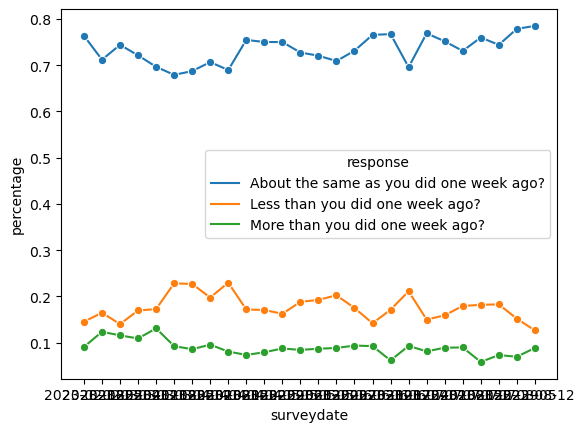

In [74]:
import seaborn as sns
p = sns.lineplot(x='surveydate', y='percentage', hue='response', data=a, marker="o")
p.set_xticks(a['surveydate'].unique())

In [75]:
source_result = pd.DataFrame(source_result)
source_result.head()

,0,1,2,3,4
0,myth,survey_date,source_pct,source,None
1,M1_VaxFail,2021-10-31T00:00:00.000000000,72.2,On social media,STL
2,M1_VaxFail,2021-10-31T00:00:00.000000000,72.2,On social media,All
3,M1_VaxFail,2021-11-07T00:00:00.000000000,60.9,Family friend or someone else,STL
4,M1_VaxFail,2021-11-07T00:00:00.000000000,60.9,Family friend or someone else,All


In [76]:
# change first row to header row
source_result = pd.DataFrame (source_result)
header_row = 0
source_result.columns = source_result.iloc[header_row]
source_result = source_result.drop(source_result.index[[0]])

In [77]:
source_result.head()

,myth,survey_date,source_pct,source,None
1,M1_VaxFail,2021-10-31T00:00:00.000000000,72.2,On social media,STL
2,M1_VaxFail,2021-10-31T00:00:00.000000000,72.2,On social media,All
3,M1_VaxFail,2021-11-07T00:00:00.000000000,60.9,Family friend or someone else,STL
4,M1_VaxFail,2021-11-07T00:00:00.000000000,60.9,Family friend or someone else,All
5,M1_VaxFail,2021-11-14T00:00:00.000000000,56.2,On social media,STL


In [78]:
# df['date'] = pd.to_datetime(df['date']).dt.date
source_result['survey_date'] = pd.to_datetime(source_result['survey_date']).dt.date

In [79]:
# name site column site
source_result.rename(columns={None:'site'}, inplace=True) #Note: None is a system column name with no single quotes

In [80]:
source_result.head()

,myth,survey_date,source_pct,source,site
1,M1_VaxFail,2021-10-31,72.2,On social media,STL
2,M1_VaxFail,2021-10-31,72.2,On social media,All
3,M1_VaxFail,2021-11-07,60.9,Family friend or someone else,STL
4,M1_VaxFail,2021-11-07,60.9,Family friend or someone else,All
5,M1_VaxFail,2021-11-14,56.2,On social media,STL


In [81]:
# strip everything including _ before name
source_result['myth'] = source_result['myth'].str.replace('..+?\_', '', 1, regex = True)

In [82]:
# pd.DataFrame(source_result).to_csv('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/Top_Sources.csv', header=True, index=False)
pd.DataFrame(source_result).to_csv('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/Top_Sources.csv', header=True, index=False)

In [83]:
# pd.DataFrame(any_heard_result).to_csv('/Users/kimjohnson/Library/CloudStorage/Box-Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/any_heard.csv', index = False)
pd.DataFrame(any_heard_result).to_csv('/Users/wyy72/Box/03_MisinformationMon/Data Team/Data management and analysis/Data inputs and outputs/3_GENERATED WEEKLY FILES/any_heard.csv', index = False)